In [1]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import *
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost.core import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn_rvm.em_rvm import EMRVR

# MAE, MSE, RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
def load_dataset(dataset):
    if dataset == 'ixi':
        ixi_train = pd.read_csv('./dataset/ixi_train.csv', index_col = 0)
        ixi_test = pd.read_csv('./dataset/ixi_test.csv', index_col = 0)

        # AGE에서 소수점 아래를 버림 -> for stratified k fold
        ixi_train['age'] = ixi_train['age'].astype('int64')
        ixi_test['age'] = ixi_test['age'].astype('int64')

        # 모든 feature의 dtype : float64
        ixi_train = ixi_train.astype('float64')
        ixi_test = ixi_test.astype('float64')
        return ixi_train, ixi_test
    
    elif dataset == 'hcp':
        hcp_train = pd.read_csv('./dataset/hcp_train.csv', index_col=0)
        hcp_test = pd.read_csv('./dataset/hcp_test.csv', index_col=0)

        hcp_train = hcp_train.astype('float64')
        hcp_test = hcp_test.astype('float64')
        return hcp_train, hcp_test
    
    elif dataset =='cc':
        cc_train = pd.read_csv('./dataset/cc_train.csv', index_col = 0)
        cc_test = pd.read_csv('./dataset/cc_test.csv', index_col = 0)

        cc_train = cc_train.astype('float64')
        cc_test = cc_test.astype('float64')
        return cc_train, cc_test

In [3]:
def load_pipelines(dataset):
    
    # Load Model
    load_ada = load_model(f'./models/{dataset}/best_model/AdaBoostRegressor')# 1
    load_ard = load_model(f'./models/{dataset}/best_model/ARDRegression')# 2
    load_br = load_model(f'./models/{dataset}/best_model/BayesianRidge')# 3
    load_dt = load_model(f'./models/{dataset}/best_model/DecisionTreeRegressor')# 4
    load_en = load_model(f'./models/{dataset}/best_model/ElasticNet')# 5
    load_et = load_model(f'./models/{dataset}/best_model/ExtraTreesRegressor')# 6
    load_gbr = load_model(f'./models/{dataset}/best_model/GradientBoostingRegressor')# 7
    load_hr = load_model(f'./models/{dataset}/best_model/HuberRegressor')# 8
    load_kr = load_model(f'./models/{dataset}/best_model/KernelRidge')# 9
    load_knn = load_model(f'./models/{dataset}/best_model/KNeighborsRegressor')# 10
    load_lars = load_model(f'./models/{dataset}/best_model/Lars')# 11
    load_lasso = load_model(f'./models/{dataset}/best_model/Lasso')# 12
    load_llar = load_model(f'./models/{dataset}/best_model/LassoLars')# 13
    load_lgbm = load_model(f'./models/{dataset}/best_model/LGBMRegressor')# 14
    load_lr = load_model(f'./models/{dataset}/best_model/LinearRegression')# 15
    load_mlp = load_model(f'./models/{dataset}/best_model/MLPRegressor')# 16
    load_omp = load_model(f'./models/{dataset}/best_model/OrthogonalMatchingPursuit')# 17
    load_par = load_model(f'./models/{dataset}/best_model/PassiveAggressiveRegressor')# 18
    load_rf = load_model(f'./models/{dataset}/best_model/RandomForestRegressor')# 19
    load_ransac = load_model(f'./models/{dataset}/best_model/RANSACRegressor')# 10
    load_ridge = load_model(f'./models/{dataset}/best_model/Ridge')# 21
    load_svr = load_model(f'./models/{dataset}/best_model/SVR')# 22
    load_xgbr = load_model(f'./models/{dataset}/best_model/XGBRegressor')# 23
    load_tr = load_model(f'./models/{dataset}/best_model/TheilSenRegressor')# 24
    load_catboost = load_model(f'./models/{dataset}/best_model/Catboost')# 25
    load_gp = load_model(f'./models/{dataset}/best_model/GaussianProcessRegressor') # 26
    #load_rvm = load_model(f'./models/{dataset}/best_model/EMRVR')




    model_list = [load_ada, load_ard, load_br, load_dt, load_en, load_et, load_gbr, load_hr, load_kr, load_knn, load_lars, load_lasso, load_llar, load_lgbm,
             load_lr, load_mlp, load_omp, load_par, load_rf, load_ransac, load_ridge, load_svr, load_xgbr, load_tr, load_catboost, load_gp]
    model_name_list = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']
    
    return model_list, model_name_list

In [4]:
ixi_trained_model, ixi_trained_model_name = load_pipelines('ixi')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [5]:
cc_trained_model, cc_trained_model_name = load_pipelines('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [6]:
hcp_trained_model, hcp_trained_model_name = load_pipelines('hcp')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [7]:
ixi_train, ixi_test= load_dataset('ixi')
hcp_train, hcp_test= load_dataset('hcp')
cc_train, cc_test= load_dataset('cc')

# Bias Correction

In [17]:
ixi_pred_age = pd.read_csv('./dataframe/ixi/ixi_predicted_age.csv', index_col=0)
hcp_pred_age = pd.read_csv('./dataframe/hcp/hcp_predicted_age.csv', index_col=0)
cc_pred_age = pd.read_csv('./dataframe/cc/cc_predicted_age.csv', index_col=0)

In [16]:
def bias_correction(pred_age, y_label):
    delta = pred_age - y_label
    z = np.polyfit(y_label, pred_age, 1)
    
    corr_pred_age = pred_age + (y_label-(z[0]*y_label+z[1]))
    corr_delta = corr_pred_age - y_label
    
    return corr_pred_age, corr_delta


'''pred_age = output_result
delta = pred_age - y_label
z = np.polyfit(y_label, pred_age, 1)

corr_pred_age = pred_age + (y_label- (z[0]*y_label + z[1]))
corr_delta = corr_pred_age - y_label'''

'pred_age = output_result\ndelta = pred_age - y_label\nz = np.polyfit(y_label, pred_age, 1)\n\ncorr_pred_age = pred_age + (y_label- (z[0]*y_label + z[1]))\ncorr_delta = corr_pred_age - y_label'

In [36]:
def cal_bias_correction(pred_age_df, test_df):
    test_df = test_df.reset_index(drop=True)
    
    corr_pred_age_df = pd.DataFrame()
    corr_delta_df = pd.DataFrame()
    
    for i in range(pred_age_df.shape[1]):
        corr_pred_age, corr_delta = bias_correction(pred_age_df.iloc[:,i], test_df['age'])
        corr_pred_age_df = pd.concat([corr_pred_age_df, corr_pred_age], axis=1)
        corr_delta_df = pd.concat([corr_delta_df, corr_delta], axis=1)
        
    corr_pred_age_df.columns = pred_age_df.columns
    corr_delta_df.columns= corr_delta_df.columns
    
    return corr_pred_age_df, corr_delta_df

In [32]:
ixi_test_reindex = ixi_test.reset_index(drop=True)
hcp_test_reindex = hcp_test.reset_index(drop=True)
cc_test_reindex = cc_test.reset_index(drop=True)

In [33]:
ixi_corr_pred_age = pd.DataFrame()
ixi_corr_delta = pd.DataFrame()

for i in range(26):
    corr_pred_age, corr_delta = bias_correction(ixi_pred_age.iloc[:,i], ixi_test_reindex['age'])
    # 각 모델별로 corrected pred age와 corrected delta를 구한 값을 구하여서 dataframe에 concatenation을 진행한다. 
    ixi_corr_pred_age = pd.concat([ixi_corr_pred_age, corr_pred_age], axis=1)
    ixi_corr_delta = pd.concat([ixi_corr_delta, corr_delta], axis=1)

# 최종적으로 26개의 모델들이 다 진행되었을 때 Column 명을 모델 명으로 변환해준다. 
ixi_corr_pred_age.columns = ixi_pred_age.columns
ixi_corr_delta.columns = ixi_pred_age.columns

In [42]:
ixi_corr_pred_age, ixi_corr_delta =cal_bias_correction(ixi_pred_age, ixi_test) 
hcp_corr_pred_age, hcp_corr_delta =cal_bias_correction(hcp_pred_age, hcp_test) 
cc_corr_pred_age, cc_corr_delta =cal_bias_correction(cc_pred_age, cc_test) 

In [38]:
ixi_corr_pred_age.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
0,43.061618,37.182569,37.042246,36.374798,36.093114,37.177061,38.094604,37.992544,38.935005,40.118041,43.900759,40.972208,42.857148,40.593583,37.300373,42.780697,21.899259,31.978923,34.029783,28.895306,31.005239,32.243937,33.185206,30.106109,29.723871,34.855349
1,28.289940,35.938920,34.647316,35.854914,36.698192,35.937339,35.557364,34.322881,33.353667,34.194495,38.974630,27.852251,35.452094,48.129997,35.760644,28.666294,45.453158,41.471571,41.026370,45.891807,46.094754,40.973694,49.690874,44.978381,36.146463,35.120166
2,62.241542,61.557567,59.866644,59.830905,60.784278,61.562249,63.672677,60.277437,61.844654,61.064943,62.287303,62.261673,62.176137,59.882860,60.946725,62.245423,67.943993,68.017422,66.814617,66.714606,66.534282,66.219270,67.802757,65.973922,62.925920,68.742191
3,41.106437,54.696145,52.732782,53.663887,53.188124,54.693277,51.591971,51.071799,50.558330,47.432605,35.574457,36.236713,42.763814,28.306194,52.127307,41.652047,37.713487,50.840663,54.005230,54.840553,54.426842,54.842878,53.892938,51.371739,50.476569,44.982923
4,27.853306,30.536559,33.159260,31.883381,31.419601,30.532539,29.470025,32.555023,30.836511,31.129841,32.343331,27.466383,30.660394,47.984583,31.618960,28.068493,27.007057,33.154220,35.044687,36.748201,36.640044,32.511686,38.470334,39.217760,36.019744,40.787493


In [43]:
hcp_corr_pred_age.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
0,21.651379,22.119626,22.416349,22.312852,21.750809,22.120004,21.188239,22.295894,21.917406,21.972661,20.916862,21.253412,21.654196,22.707930,22.598441,21.686156,23.817730,23.345615,23.028127,22.555363,23.513048,23.368864,22.877445,23.067957,23.307172,21.608065
1,34.920007,33.819922,33.396706,33.537125,34.406500,33.819248,34.812620,33.578394,33.814092,34.063336,34.809240,34.697212,34.664586,33.724359,33.562828,34.893232,32.629640,33.257439,33.133333,33.027853,32.794623,32.148679,32.788184,33.075347,33.187827,34.902418
2,28.886343,29.223091,29.248363,29.101483,29.734659,29.222414,29.193231,29.064105,29.129138,28.476383,29.164327,28.957903,28.931503,29.696933,29.511674,28.869889,30.397325,30.254182,30.102841,30.119306,30.300956,29.426814,30.168790,30.735521,29.743173,28.973324
3,35.955513,33.557732,32.228923,32.581024,34.535635,33.560074,35.654612,32.671635,34.917100,33.811918,36.741614,36.227601,35.837336,32.379791,31.105700,35.841484,26.987272,30.606671,30.441241,31.457081,31.001664,30.264758,31.203173,31.109863,31.545343,35.921182
4,18.058719,19.910389,20.342266,20.193610,19.182003,19.908965,18.763470,20.151939,19.129394,19.472890,17.529924,17.922928,18.047303,17.212458,20.818587,18.125449,21.321705,19.959217,19.920055,21.482254,19.333542,20.506026,20.826427,19.797480,18.469604,18.048198


In [44]:
cc_corr_pred_age.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
0,17.410120,17.723673,17.020233,17.392820,11.571989,17.835581,19.098699,15.455470,16.873210,16.047384,16.325660,19.561660,15.984958,29.316239,18.764086,17.371133,25.616578,20.430439,20.070875,21.520003,24.280207,20.454097,23.621239,22.120014,20.854609,17.290336
1,27.768913,25.682941,26.643602,25.547997,31.426777,25.576884,24.220495,25.188672,26.245715,25.339503,27.195351,29.469620,25.565773,21.716514,25.878793,27.608395,28.986223,26.801752,27.036676,28.582599,27.447934,26.593388,29.618085,24.379269,26.712878,27.610084
2,36.691505,33.157215,35.308918,32.682937,31.064584,33.081379,33.179712,33.584356,34.400933,34.024279,37.105214,36.265782,33.816289,34.039254,30.488498,36.493203,21.316578,28.222544,27.190823,24.024255,26.326077,27.995697,23.649156,25.549738,24.067360,36.810292
3,19.752691,24.176294,21.199625,24.603907,22.359833,25.028791,23.744940,24.473669,23.687305,22.667701,19.457466,21.689864,23.328075,27.515203,22.696328,19.924058,15.027994,22.482303,22.814342,21.706736,25.788379,25.660702,24.287021,27.001457,23.180632,19.780532
4,12.936563,15.882574,13.376576,15.446195,20.895558,16.038366,17.182786,14.068602,14.157104,13.508725,12.900518,15.652698,13.770390,14.002874,15.775584,13.000421,35.065051,19.691525,18.337288,20.316642,16.612580,20.337399,17.797909,17.426169,20.056832,13.099985


In [45]:
ixi_corr_pred_age.to_csv('./dataframe/ixi/ixi_corr_pred_age.csv')
ixi_corr_delta.to_csv('./dataframe/ixi/ixi_corr_delta.csv')

hcp_corr_pred_age.to_csv('./dataframe/hcp/hcp_corr_pred_age.csv')
hcp_corr_delta.to_csv('./dataframe/hcp/hcp_corr_delta.csv')

cc_corr_pred_age.to_csv('./dataframe/cc/cc_corr_pred_age.csv')
cc_corr_delta.to_csv('./dataframe/cc/cc_corr_delta.csv')

# Scatter Plot

### Bias correction을 하지 않은 Predicted Brain Age 

**IXI**

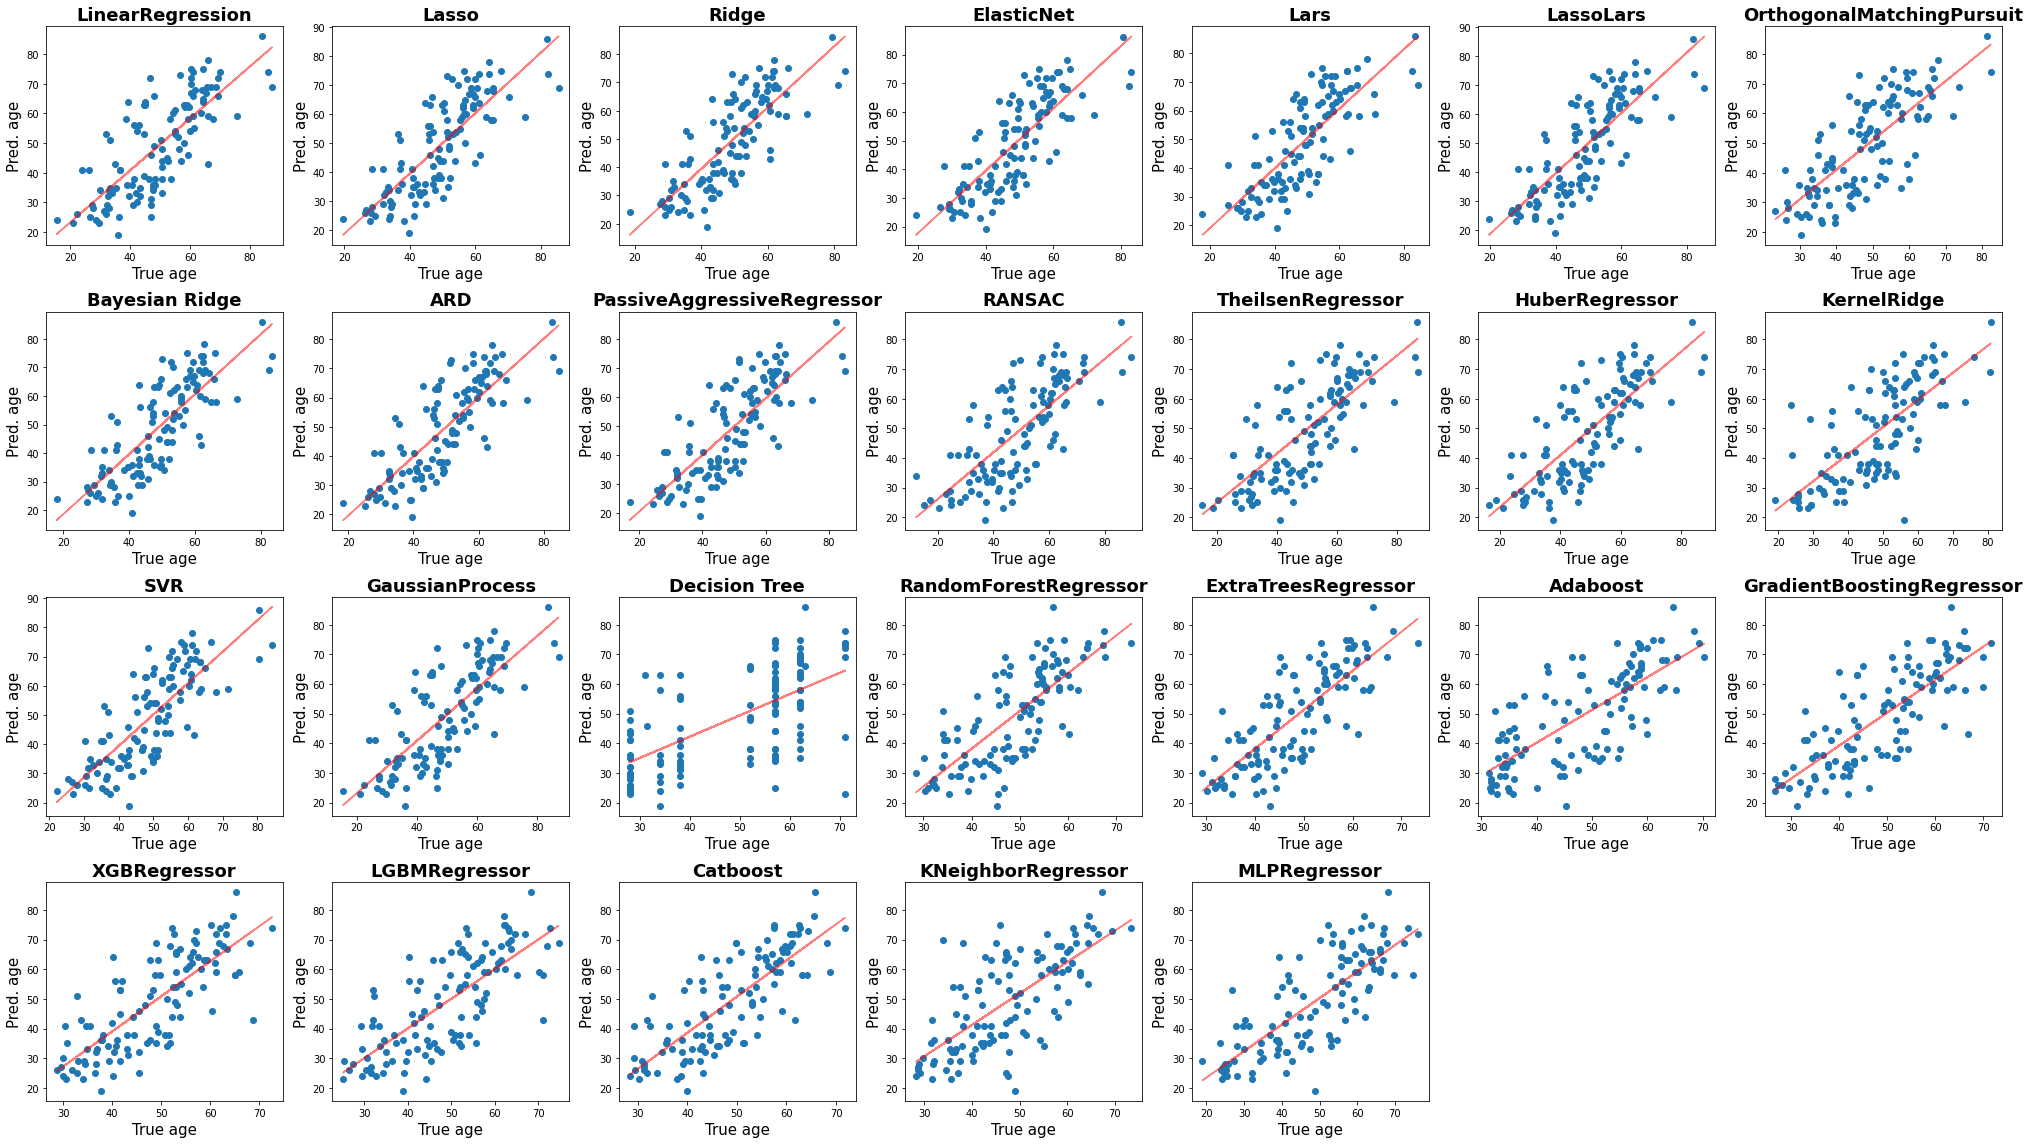

In [87]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(ixi_pred_age.iloc[:,i-1], ixi_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(ixi_pred_age.iloc[:,i-1], ixi_test_reindex['age'])
    plt.plot(ixi_pred_age.iloc[:,i-1], a * (ixi_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{ixi_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/ixi_pred_age_scatterplot.png', dpi=500)
plt.show()

**HCP**

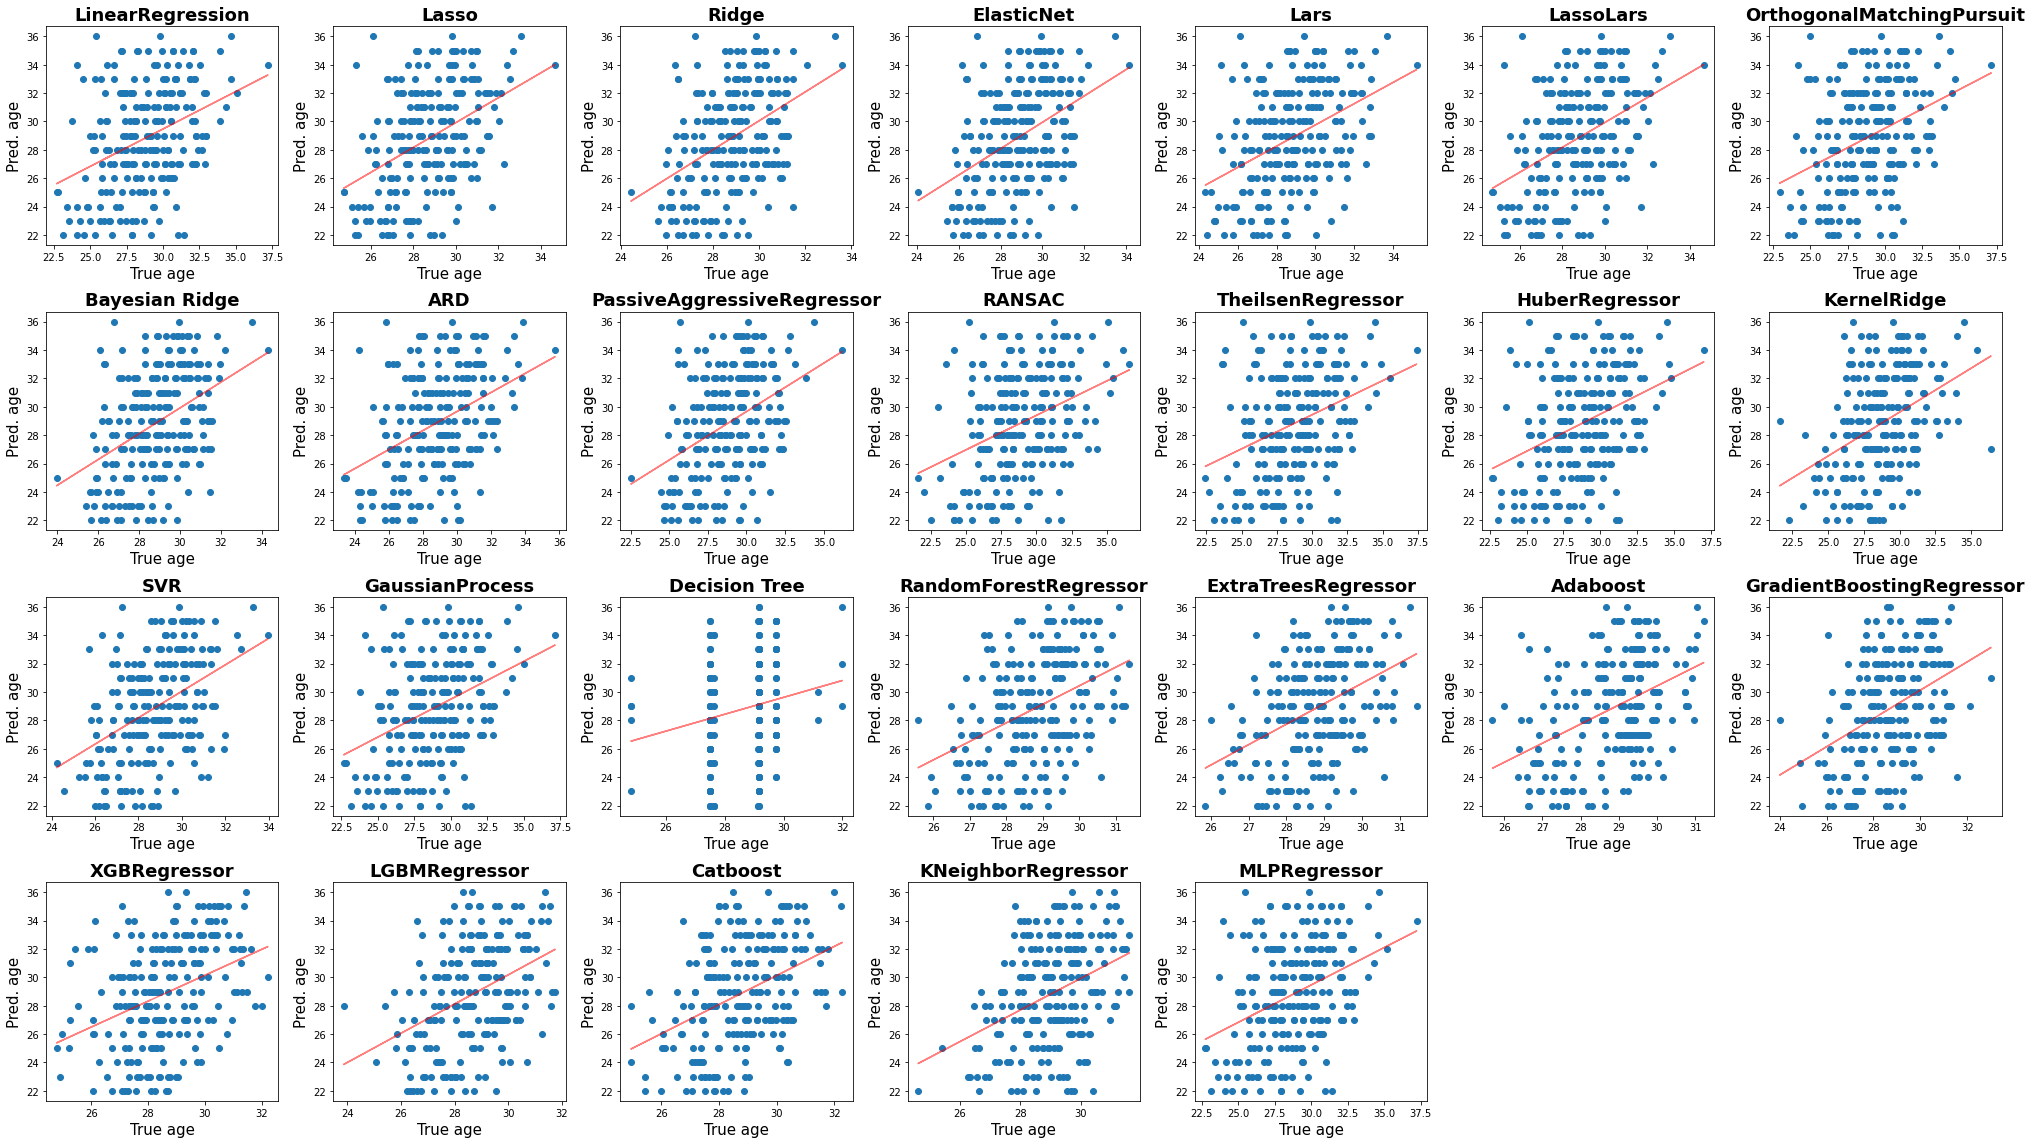

In [88]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(hcp_pred_age.iloc[:,i-1], hcp_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(hcp_pred_age.iloc[:,i-1], hcp_test_reindex['age'])
    plt.plot(hcp_pred_age.iloc[:,i-1], a * (hcp_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{hcp_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/hcp_pred_age_scatterplot.png', dpi=500)
plt.show()


**CAMCAN**

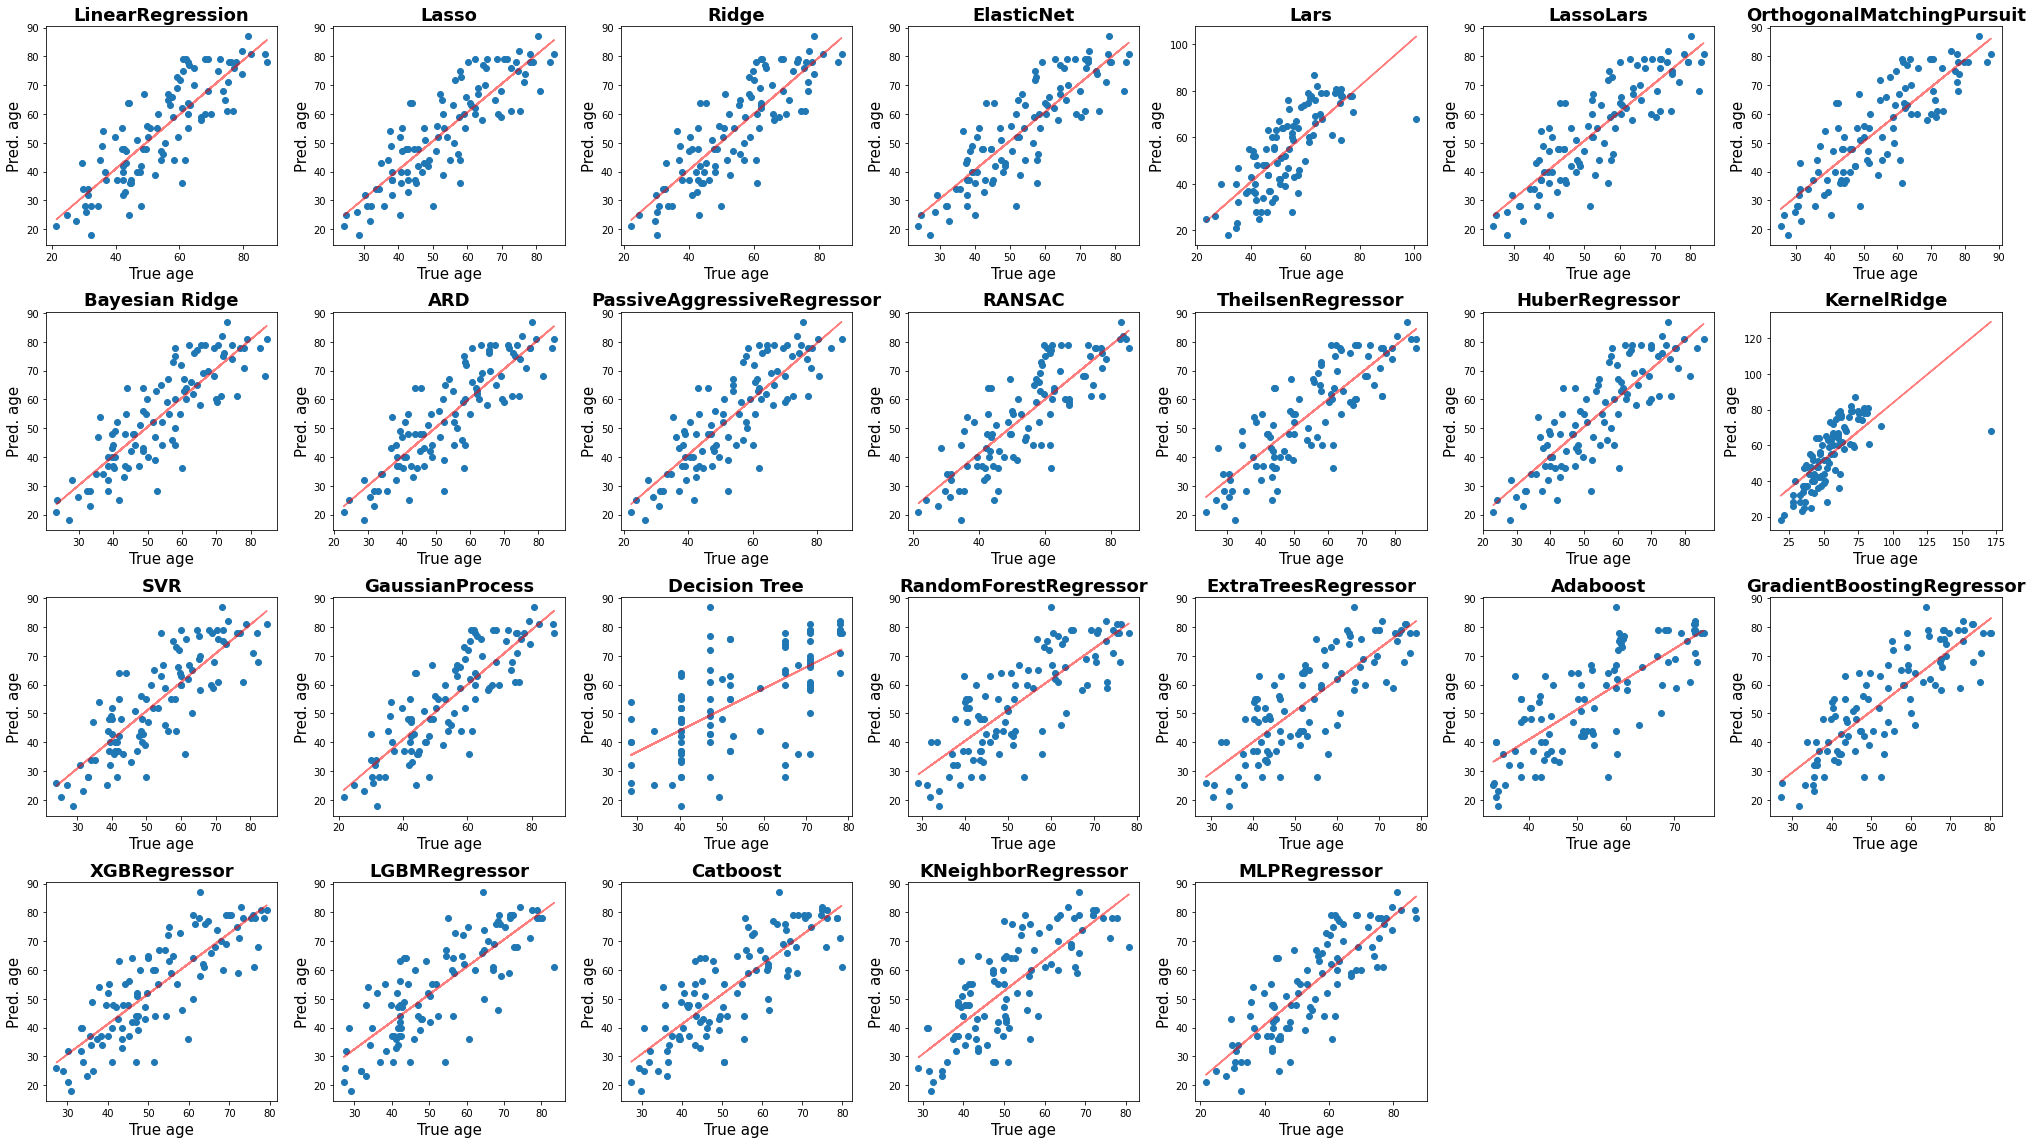

In [89]:

plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(cc_pred_age.iloc[:,i-1], cc_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(cc_pred_age.iloc[:,i-1], cc_test_reindex['age'])
    plt.plot(cc_pred_age.iloc[:,i-1], a * (cc_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{cc_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/cc_pred_age_scatterplot.png', dpi=500)
plt.show()



### Bias correction을 한 Predicted Brain Age 

In [86]:
ixi_corr_pred_age= pd.read_csv('./dataframe/ixi/ixi_corr_pred_age.csv', index_col=0)
hcp_corr_pred_age = pd.read_csv('./dataframe/hcp/hcp_corr_pred_age.csv', index_col=0)
cc_corr_pred_age = pd.read_csv('./dataframe/cc/cc_corr_pred_age.csv', index_col=0)

**IXI**

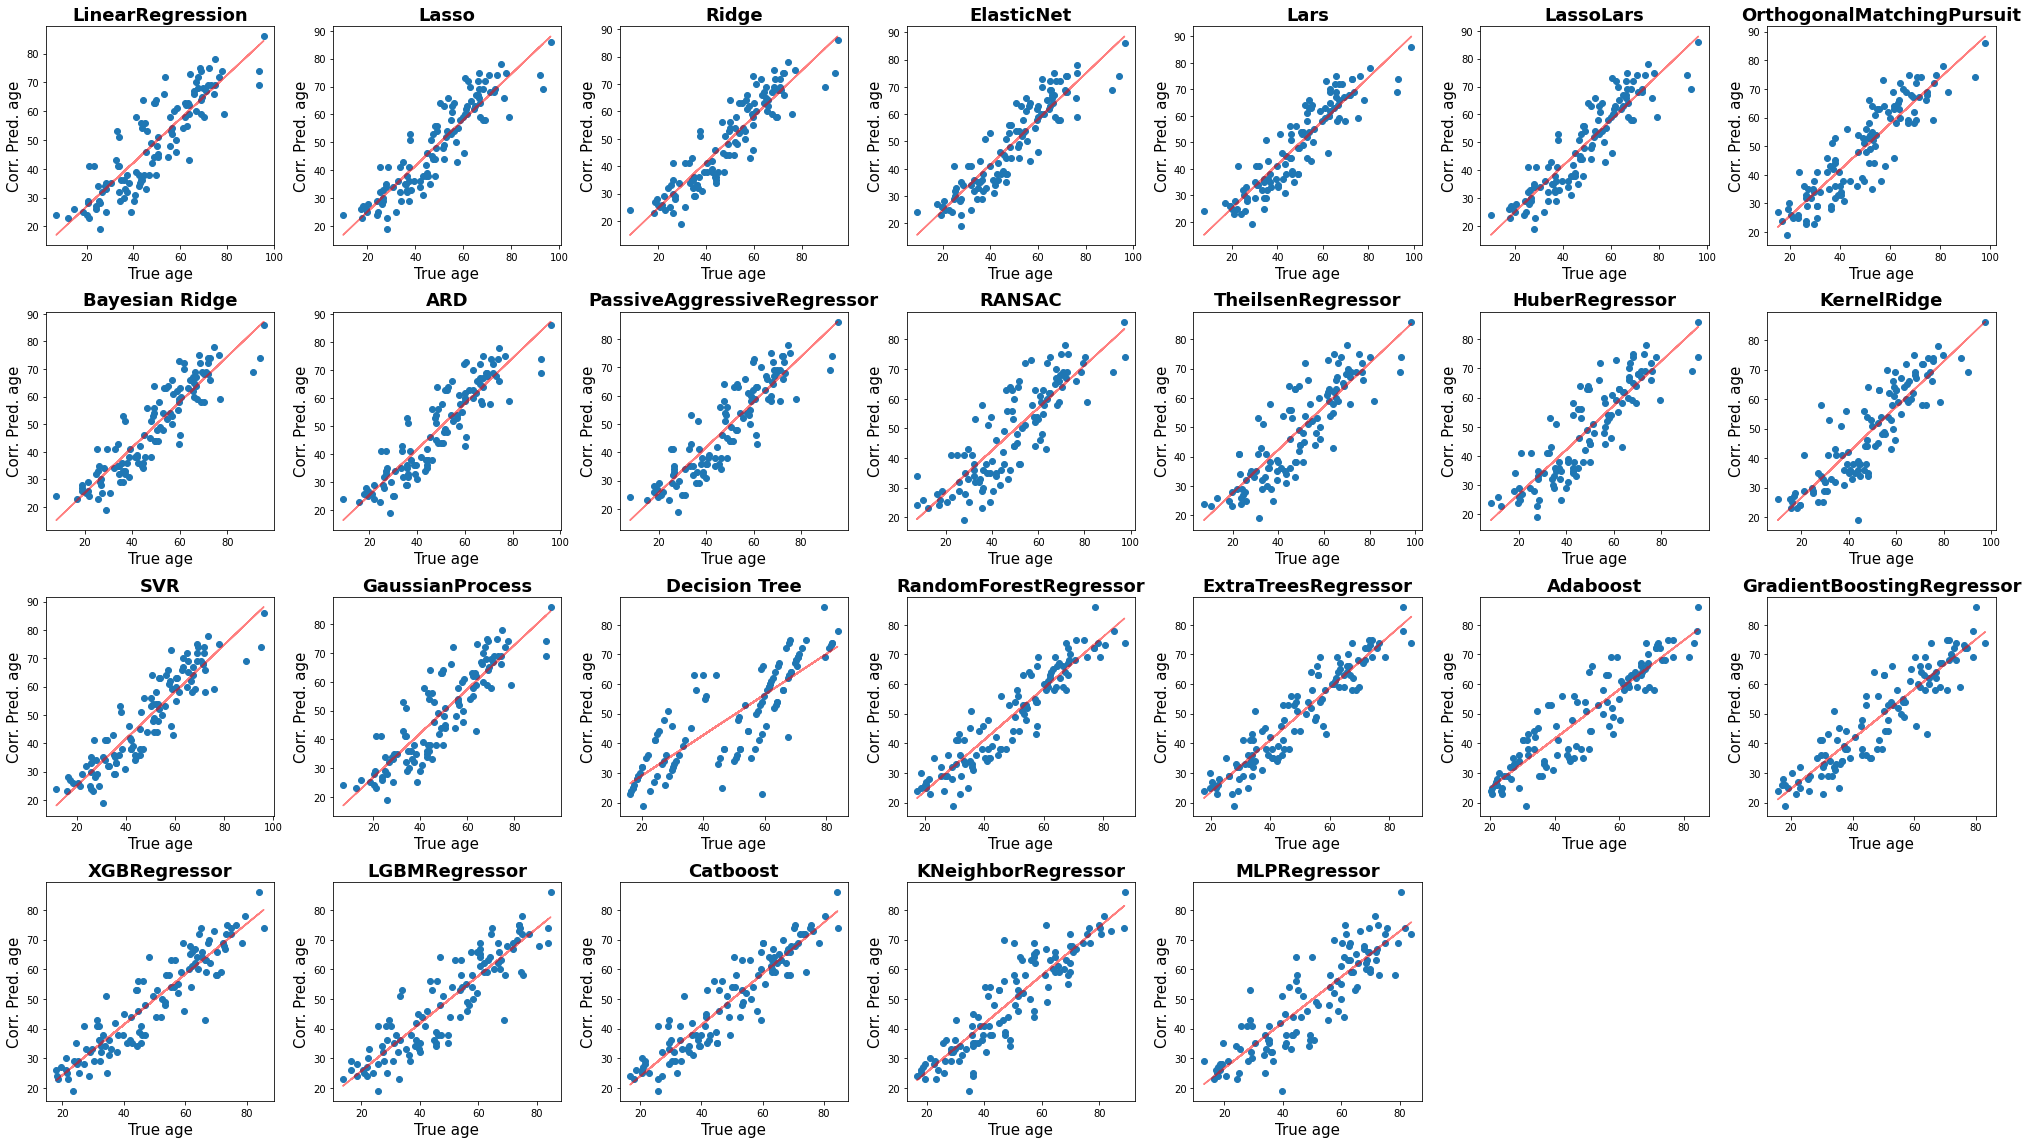

In [91]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(ixi_corr_pred_age.iloc[:,i-1], ixi_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(ixi_corr_pred_age.iloc[:,i-1], ixi_test_reindex['age'])
    plt.plot(ixi_corr_pred_age.iloc[:,i-1], a * (ixi_corr_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{ixi_corr_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/ixi_corr_pred_age_scatterplot.png', dpi=500)
plt.show()

**HCP**

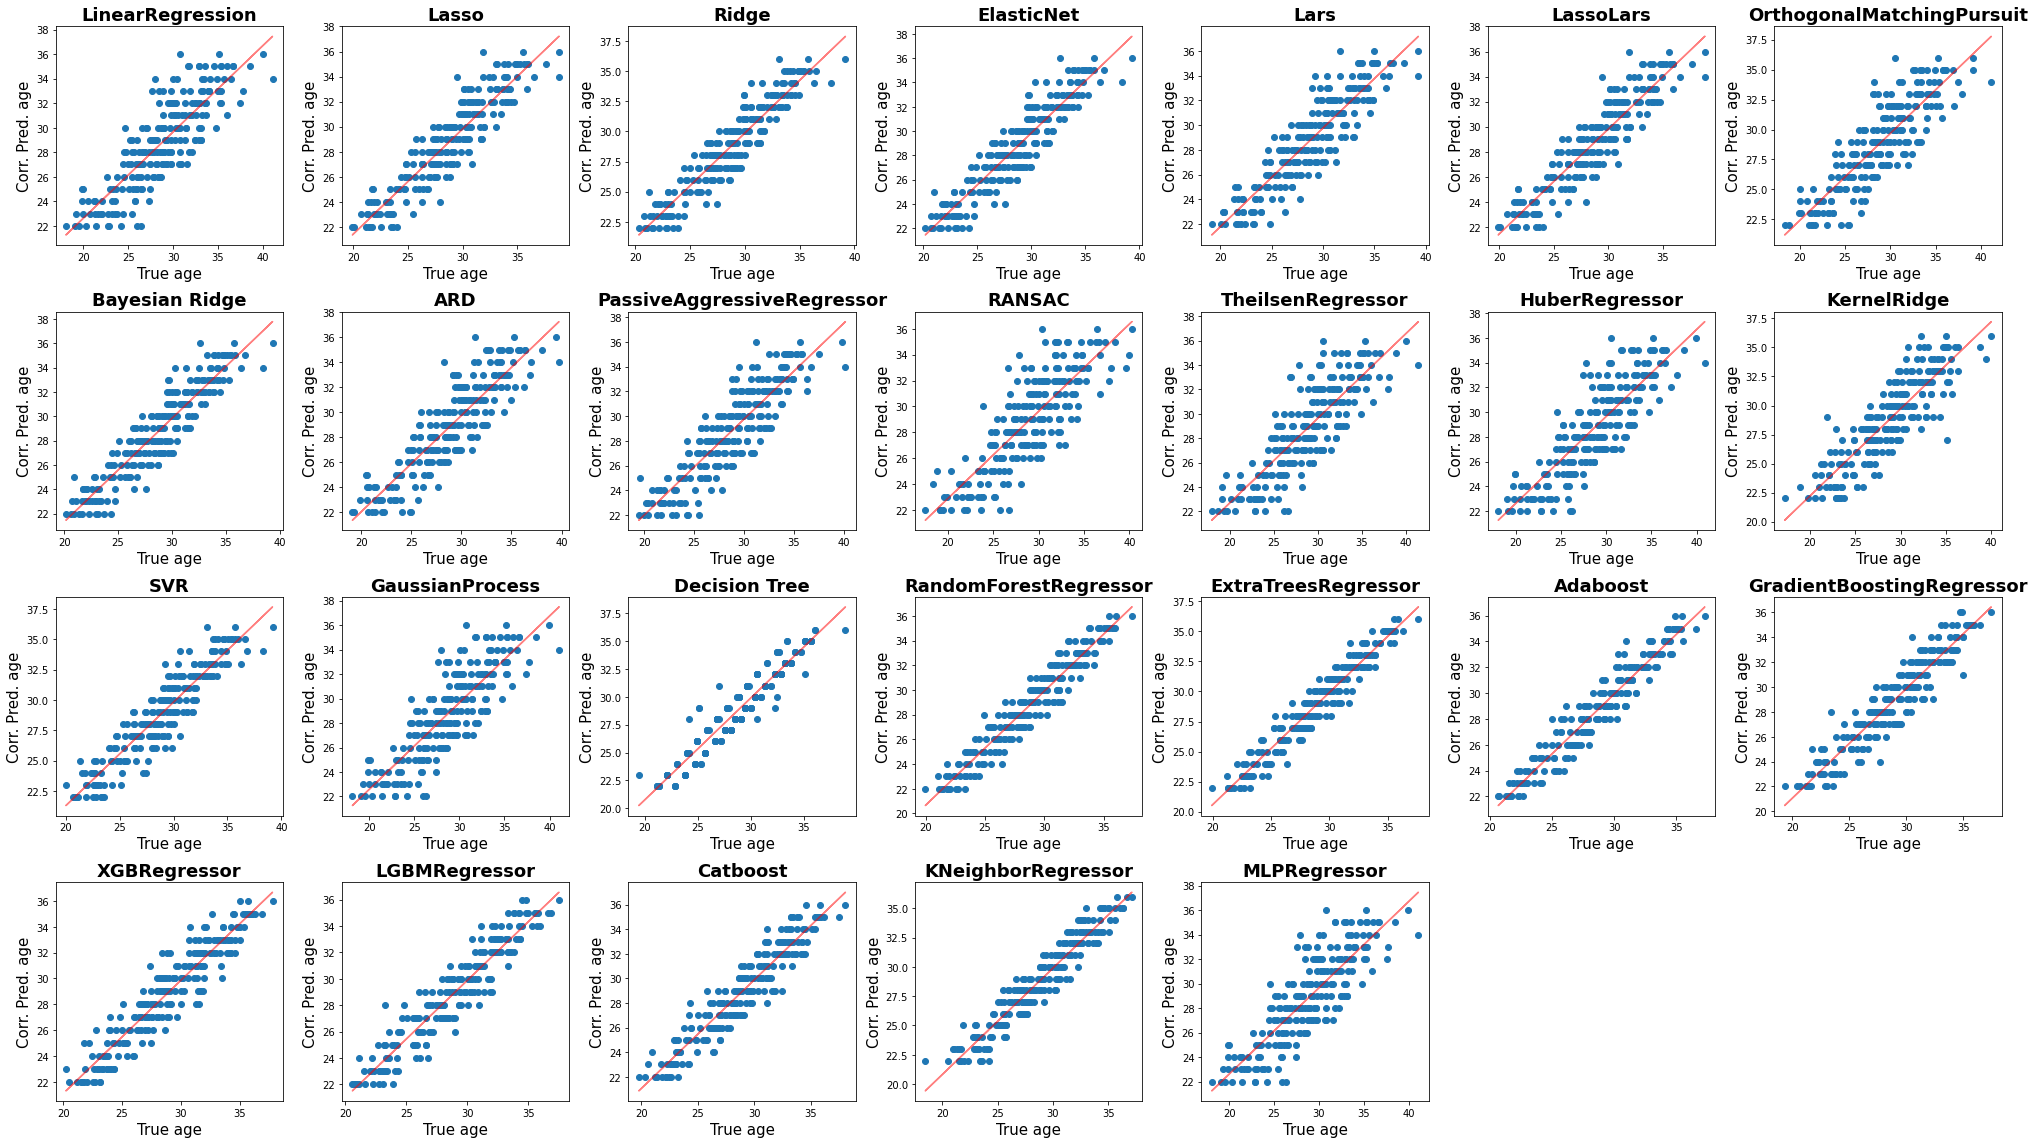

In [92]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(hcp_corr_pred_age.iloc[:,i-1], hcp_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(hcp_corr_pred_age.iloc[:,i-1], hcp_test_reindex['age'])
    plt.plot(hcp_corr_pred_age.iloc[:,i-1], a * (hcp_corr_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{hcp_corr_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/hcp_corr_pred_age_scatterplot.png', dpi=500)
plt.show()

**CAMCAN**

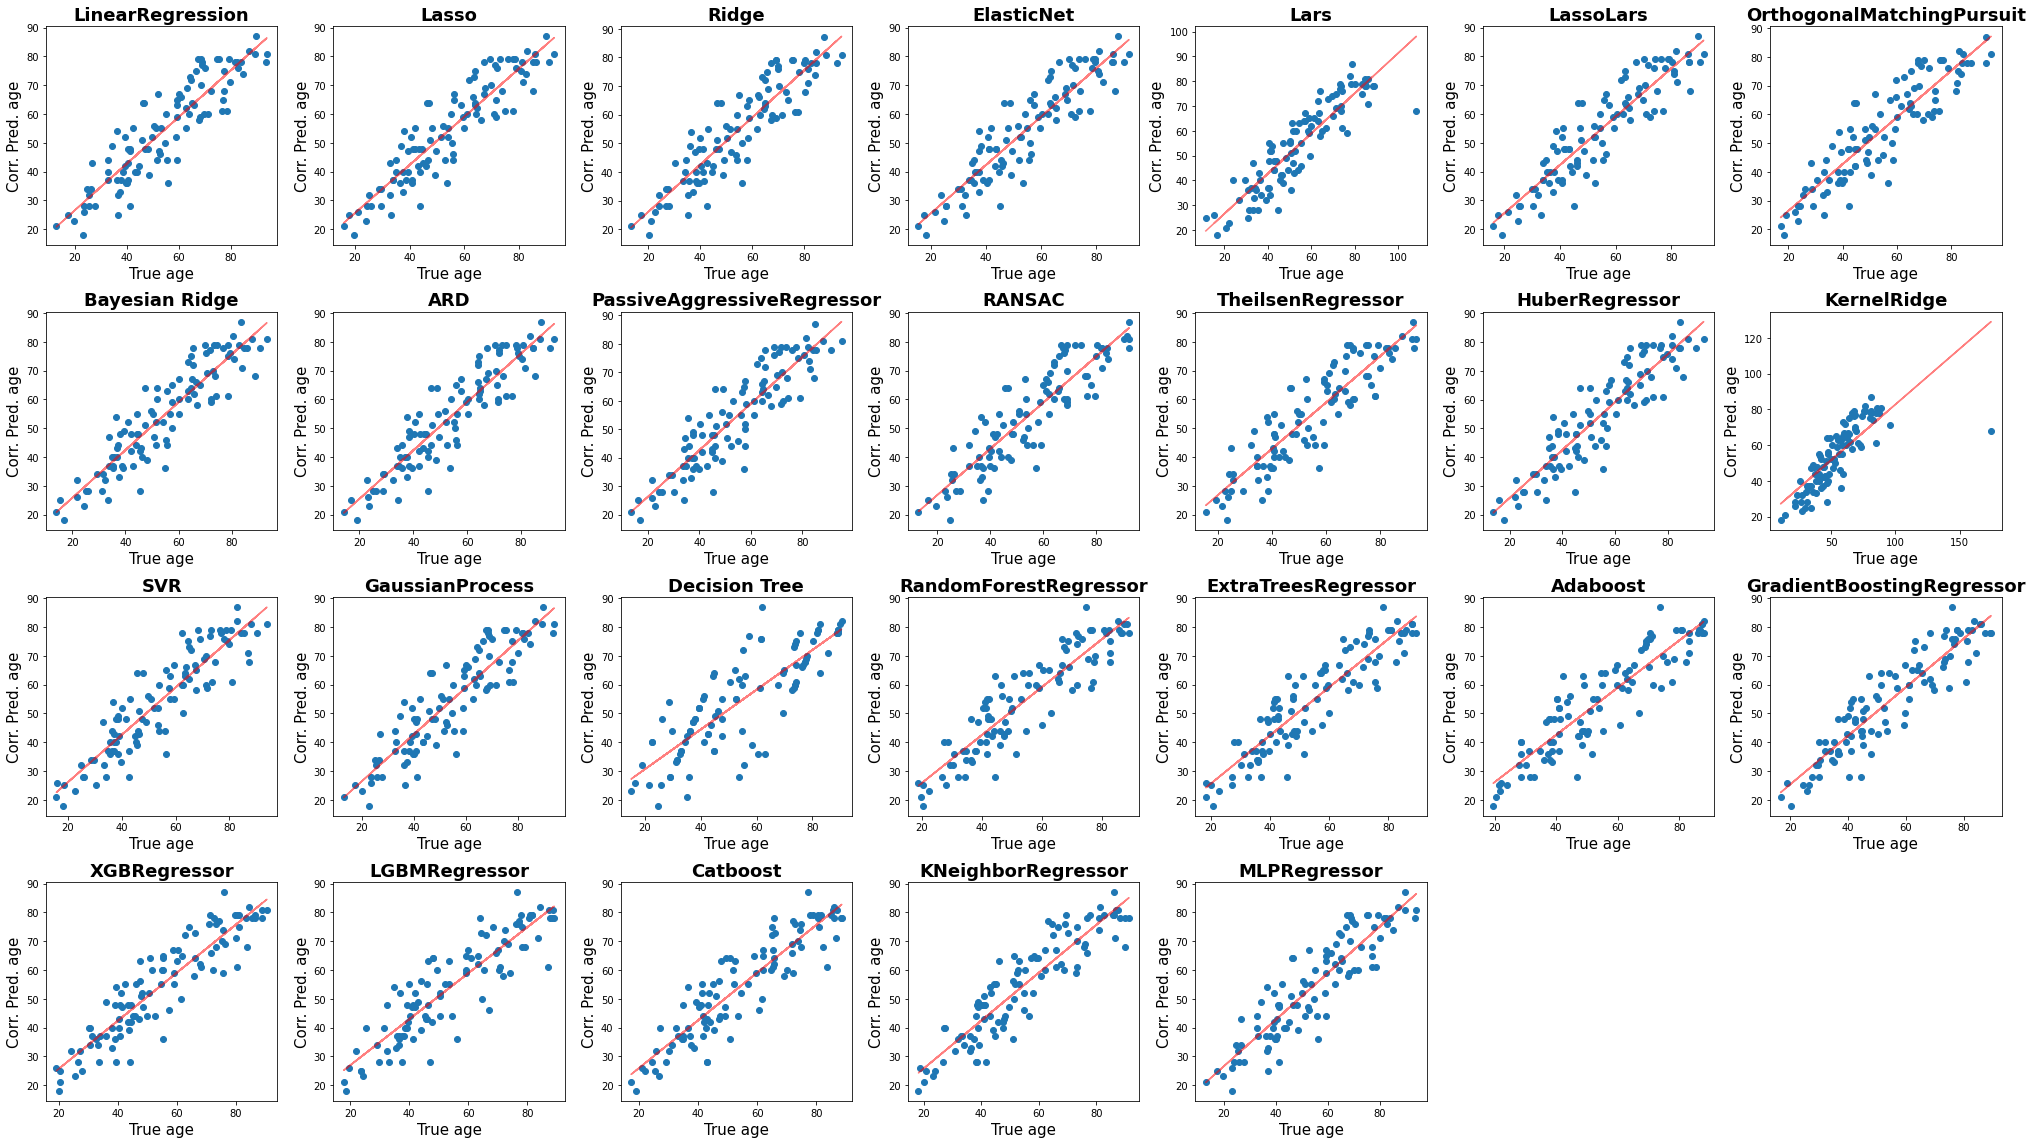

In [93]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(cc_corr_pred_age.iloc[:,i-1], cc_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(cc_corr_pred_age.iloc[:,i-1], cc_test_reindex['age'])
    plt.plot(cc_corr_pred_age.iloc[:,i-1], a * (cc_corr_pred_age.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{cc_corr_pred_age.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Pred. age', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/cc_corr_pred_age_scatterplot.png', dpi=500)
plt.show()

### Corrected Delta 

In [94]:
ixi_corr_delta= pd.read_csv('./dataframe/ixi/ixi_corr_delta.csv', index_col=0)
hcp_corr_delta= pd.read_csv('./dataframe/hcp/hcp_corr_delta.csv', index_col=0)
cc_corr_delta= pd.read_csv('./dataframe/cc/cc_corr_delta.csv', index_col=0)

In [97]:
ixi_corr_delta.columns = ixi_pred_age.columns
hcp_corr_delta.columns = hcp_pred_age.columns
cc_corr_delta.columns = cc_pred_age.columns

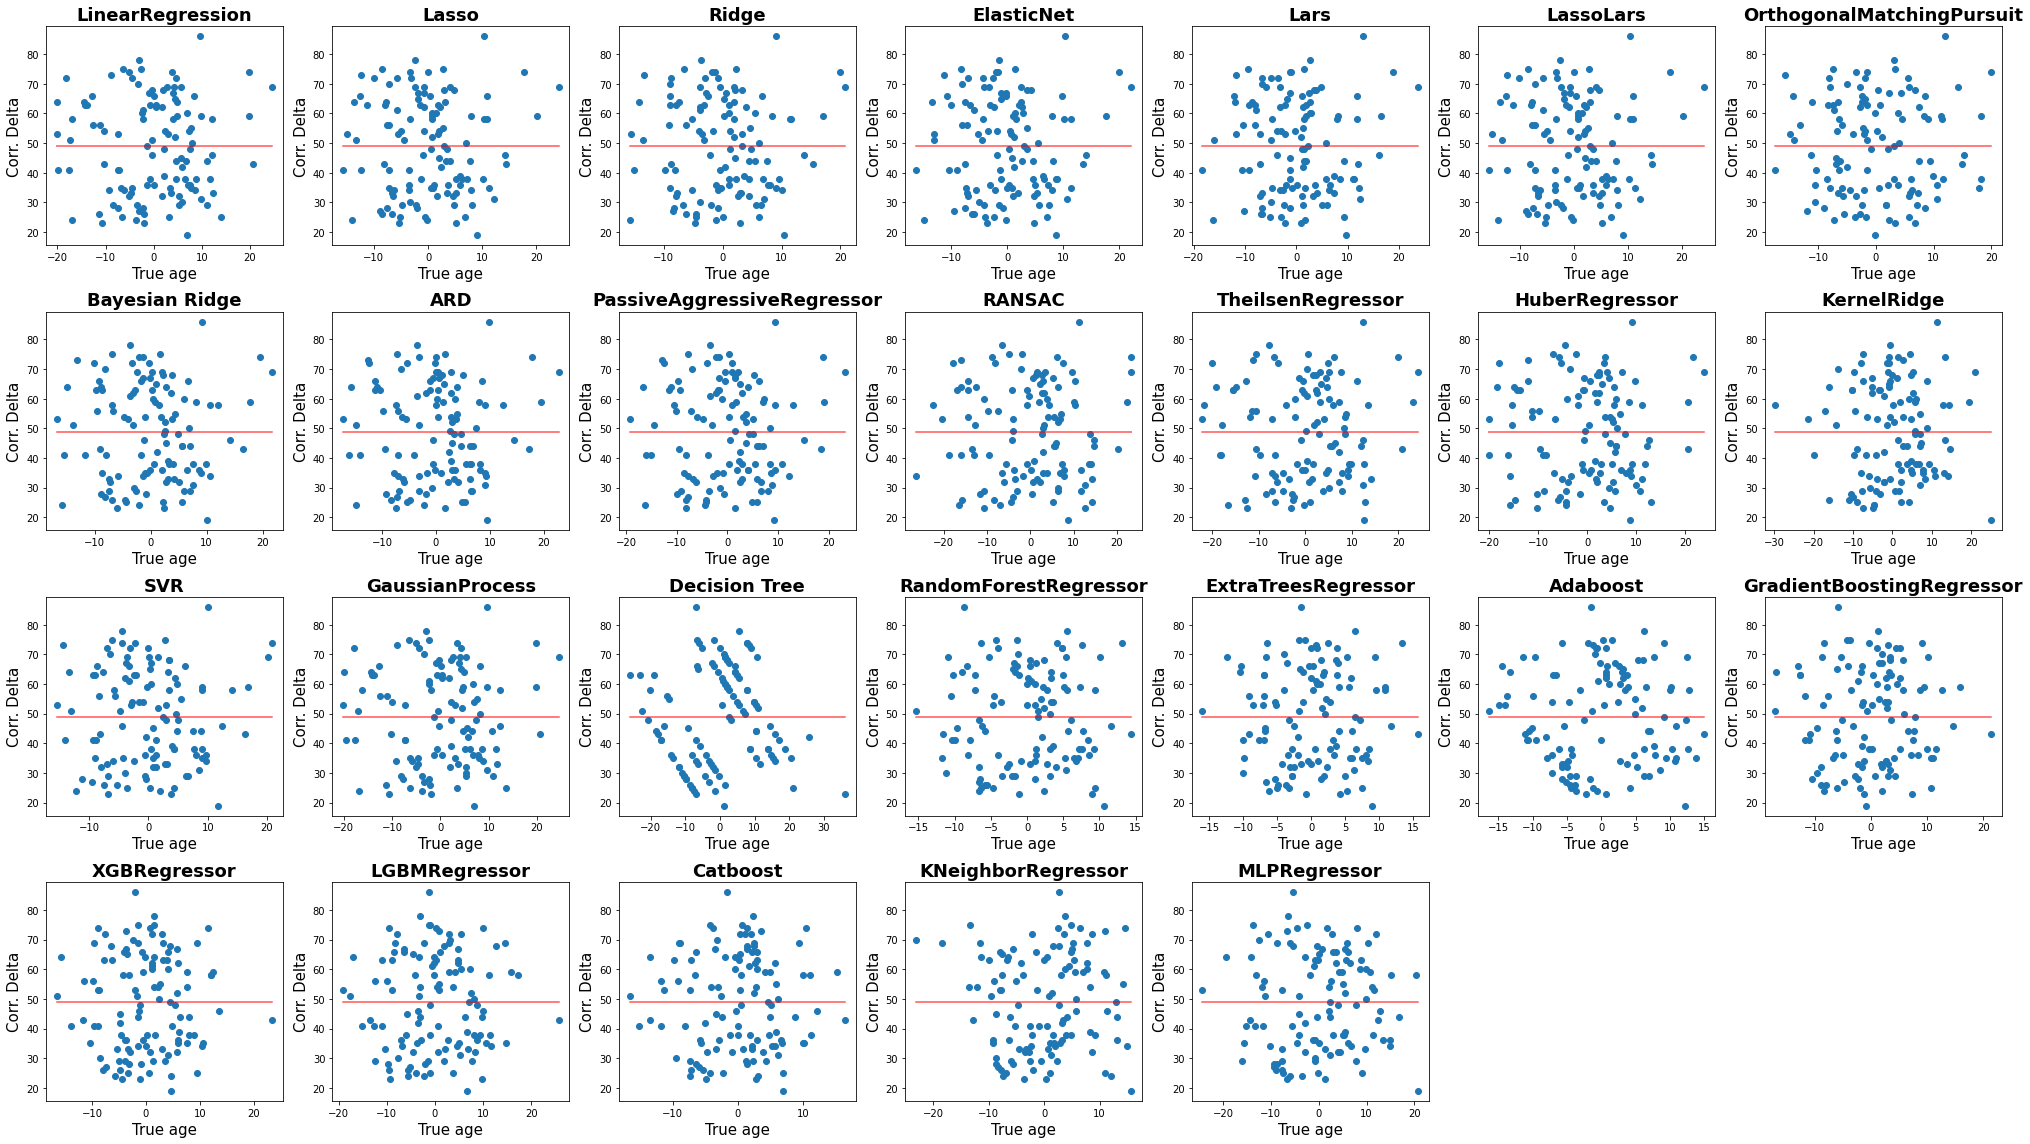

In [99]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(ixi_corr_delta.iloc[:,i-1], ixi_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(ixi_corr_delta.iloc[:,i-1], ixi_test_reindex['age'])
    plt.plot(ixi_corr_delta.iloc[:,i-1], a * (ixi_corr_delta.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{ixi_corr_delta.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Delta', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/ixi_corr_delta_scatterplot.png', dpi=500)
plt.show()

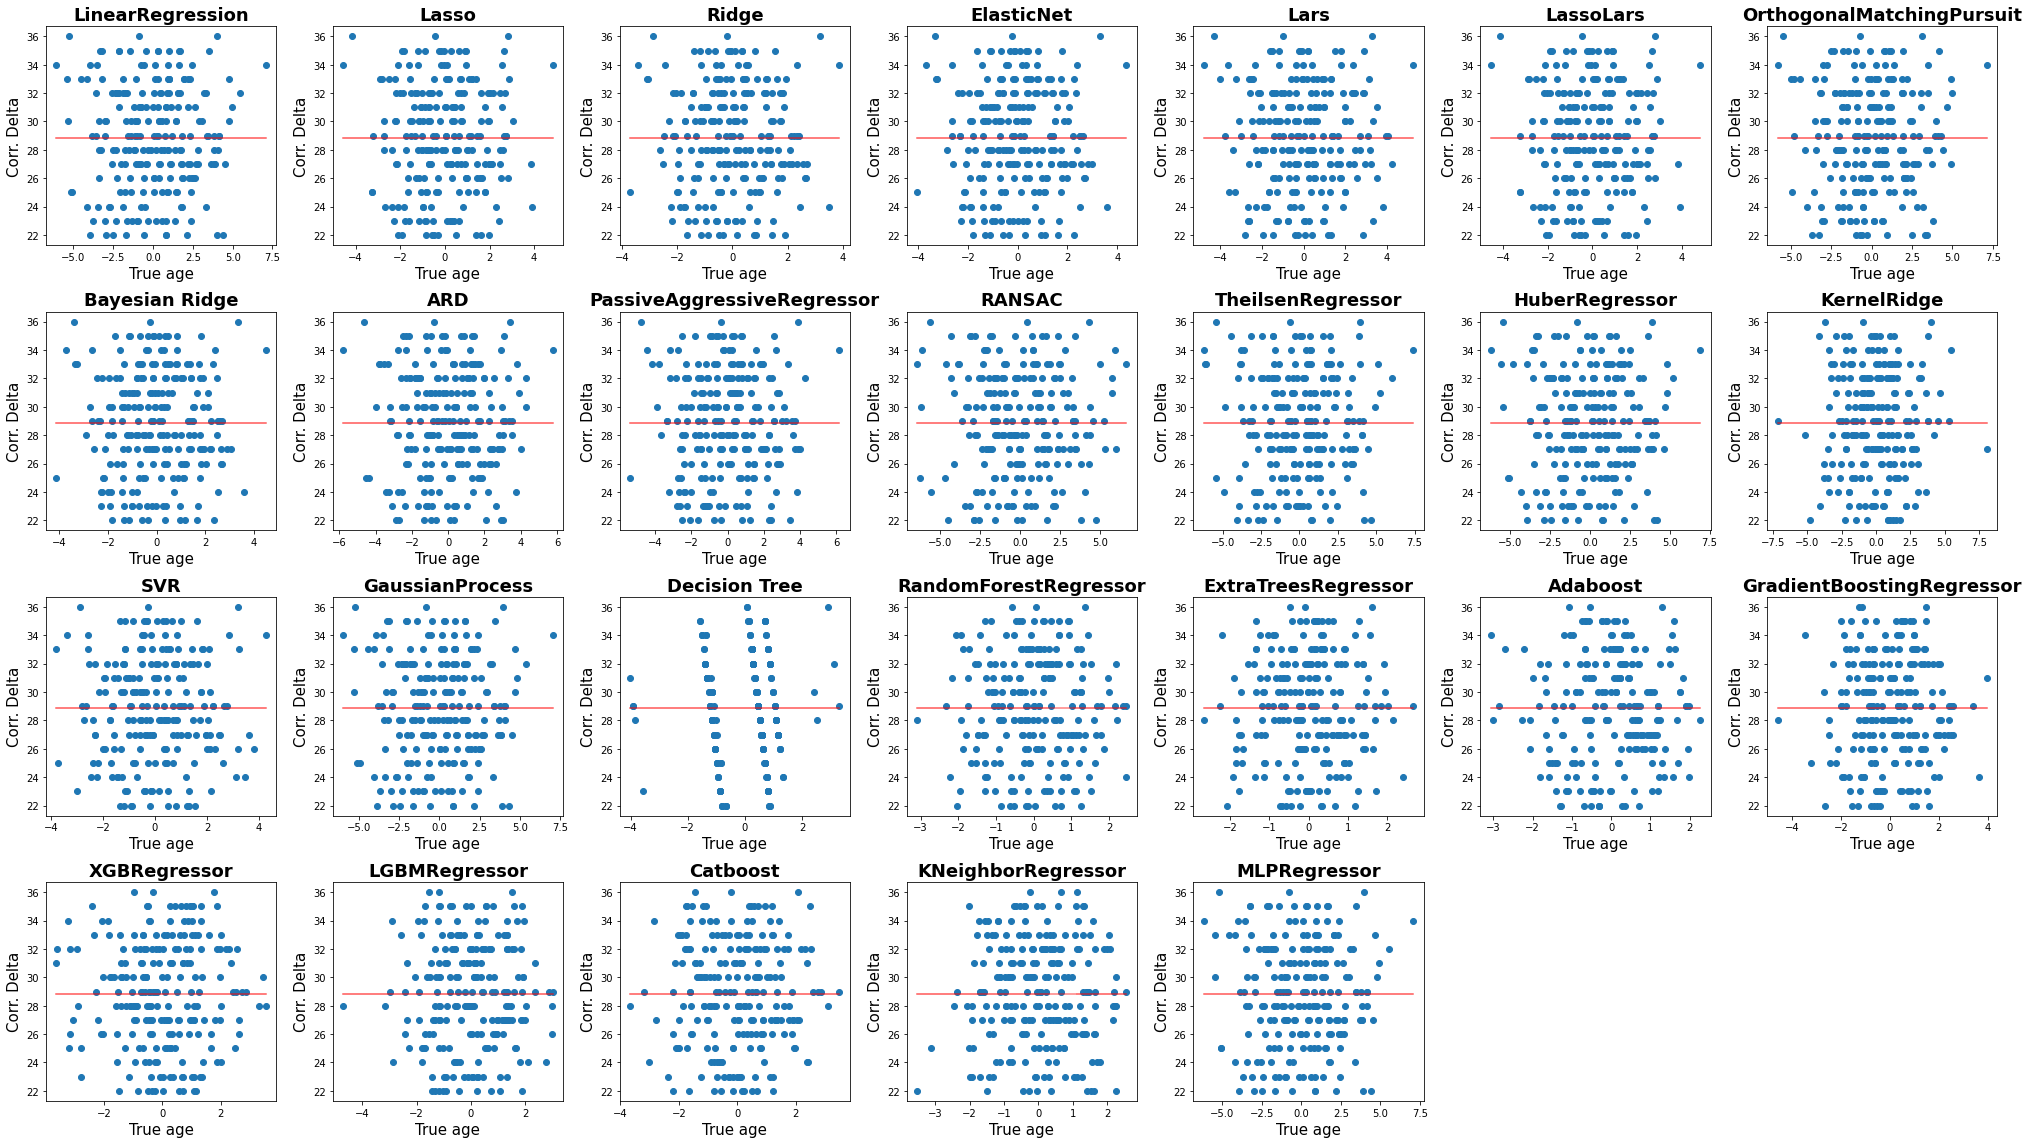

In [101]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(hcp_corr_delta.iloc[:,i-1], hcp_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(hcp_corr_delta.iloc[:,i-1], hcp_test_reindex['age'])
    plt.plot(hcp_corr_delta.iloc[:,i-1], a * (hcp_corr_delta.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{hcp_corr_delta.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Delta', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/hcp_corr_delta_scatterplot.png', dpi=500)
plt.show()

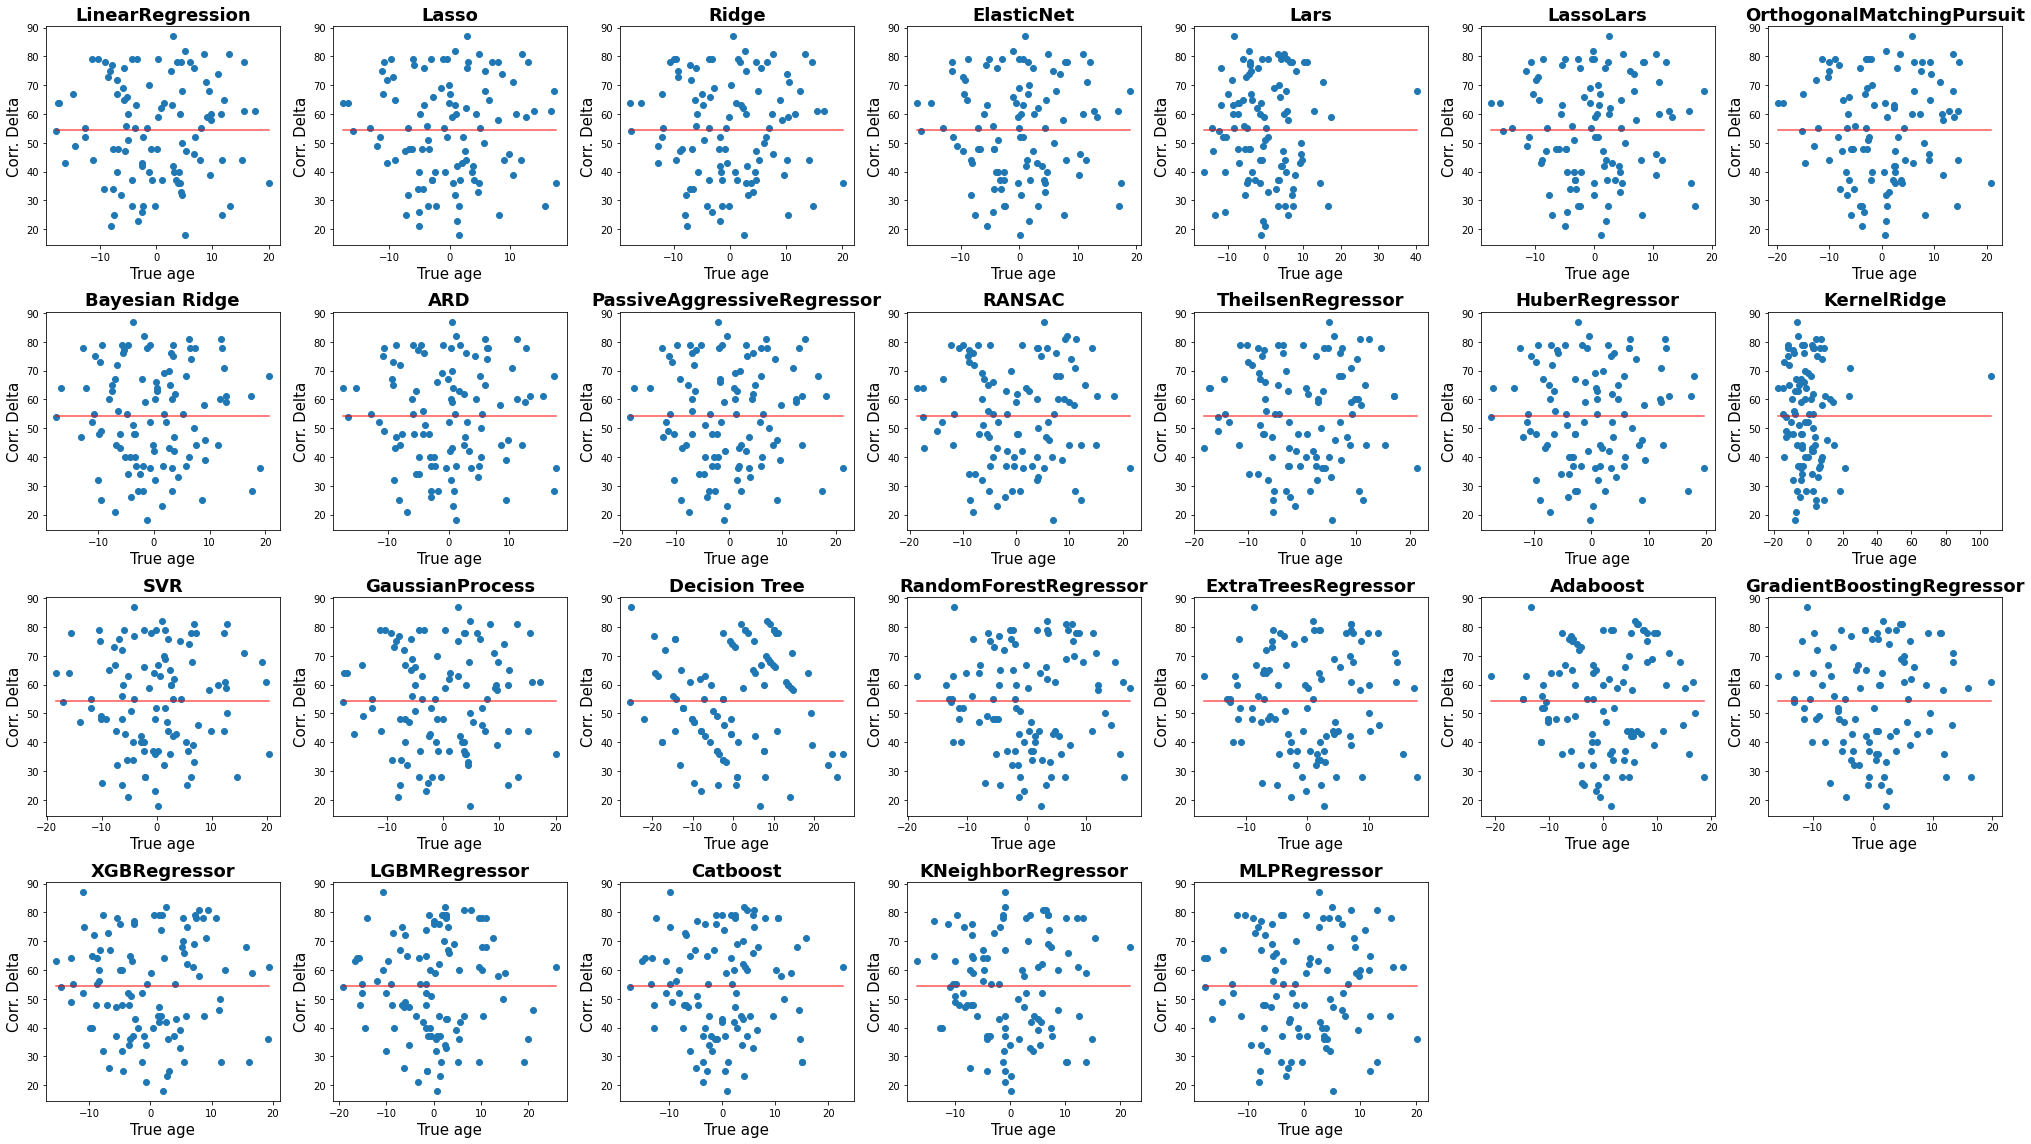

In [102]:
plt.figure(figsize=(28,16))
for i in range(1, 27):
    a, b = np.polyfit(cc_corr_delta.iloc[:,i-1], cc_test_reindex['age'], 1)
    plt.subplot(4,7,i)
    plt.scatter(cc_corr_delta.iloc[:,i-1], cc_test_reindex['age'])
    plt.plot(cc_corr_delta.iloc[:,i-1], a * (cc_corr_delta.iloc[:,i-1]) + b, color='red', alpha=0.5)
    plt.title(f"{cc_corr_delta.columns[i-1]}", fontsize=18, weight='bold')
    plt.ylabel('Corr. Delta', fontsize=15)
    plt.xlabel('True age', fontsize=15)
    # plt.text(25, 80, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.tight_layout()
plt.savefig('./visualization/0803/cc_corr_delta_scatterplot.png', dpi=500)
plt.show()


# Relevance Vector Machine 

교수님이 보내주신 링크로

In [103]:
from skrvm import RVR

In [104]:
ixi_train, ixi_test= load_dataset('ixi')
hcp_train, hcp_test= load_dataset('hcp')
cc_train, cc_test= load_dataset('cc')

In [127]:
cc_setting = setup(session_id = 1, data = cc_train, target = 'age', test_data = cc_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(500, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(500, 153)"


In [129]:
cc_rvr = RVR(kernel='linear')
cc_rvr_pipe = create_model(cc_rvr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.4237,70.6296,8.4041,0.7862,0.1780,0.1401
1,7.8279,89.1819,9.4436,0.7318,0.2113,0.1726
2,6.6523,70.0371,8.3688,0.7952,0.1766,0.1424
3,6.8852,66.2880,8.1417,0.8065,0.1895,0.1559
4,5.5418,44.9024,6.7009,0.8652,0.1482,0.1196
5,7.1460,79.5466,8.9189,0.7617,0.1709,0.1396
6,7.2447,80.1125,8.9506,0.7572,0.1784,0.1503
7,7.1833,87.8110,9.3708,0.7273,0.2094,0.1413
8,7.1112,84.0648,9.1687,0.7468,0.1977,0.1608
9,7.3385,84.9982,9.2194,0.7431,0.1717,0.1458


In [ ]:
save_model(cc_rvr_pipe, './

In [123]:
hcp_setting = setup(session_id = 1, data = hcp_train, target = 'age', test_data = hcp_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(890, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(890, 153)"


In [125]:
ixi_setting = setup(session_id = 1, data = ixi_train, target = 'age', test_data = ixi_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(453, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(453, 153)"
